In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [3]:
cleaned_jacobs = jacobs.loc[jacobs['ppsk'] != 'MISSING']
cleaned_jacobs['ppsk'] = cleaned_jacobs.loc[:, 'ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
demographics = student_courses[['ppsk']].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left').drop_duplicates().rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
urms = demographics[demographics['Ethnicity'] == 'Underrepresented Minority']

In [5]:
urms

,ppsk,Ethnicity,Gender
706,787652,Underrepresented Minority,Male
708,791882,Underrepresented Minority,Female
721,813809,Underrepresented Minority,Male
1249,609891,Underrepresented Minority,Male
1932,656505,Underrepresented Minority,Female
...,...,...,...
4414192,2768138,Underrepresented Minority,Female
4414199,2769675,Underrepresented Minority,Male
4609806,1487118,Underrepresented Minority,Female
5377072,2428229,Underrepresented Minority,Male


In [6]:
test = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[demographics.groupby('Ethnicity').count().loc[[True,True,False,True]].sum(),
demographics.groupby('Ethnicity').count().loc['Underrepresented Minority']])

Text(0.5, 1.0, 'URMs at Berkeley')

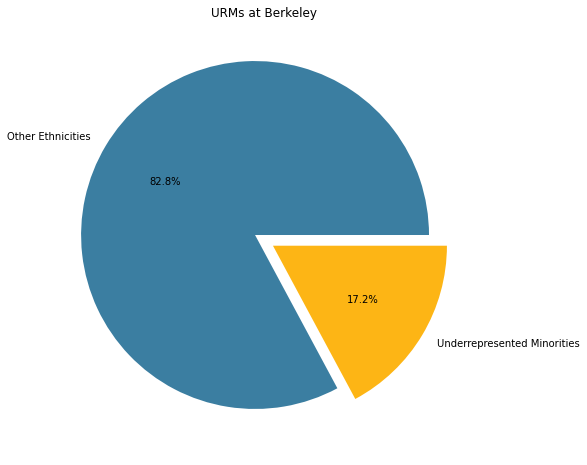

In [7]:
urms_berk = test['ppsk']

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_berk, labels = urms_berk.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=blue_gold)
plt.title("URMs at Berkeley")

In [8]:
urms_women = urms.groupby('Gender').count().loc[[False,True,True],:].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

In [9]:
urms[urms['Gender'] == "Decline to State"]

,ppsk,Ethnicity,Gender
4114842,2765420,Underrepresented Minority,Decline to State
4152245,2755088,Underrepresented Minority,Decline to State
4153361,2765304,Underrepresented Minority,Decline to State
4219404,2752340,Underrepresented Minority,Decline to State
4232267,2734285,Underrepresented Minority,Decline to State
4281294,2744218,Underrepresented Minority,Decline to State
4281682,2752977,Underrepresented Minority,Decline to State


Text(0.5, 1.0, 'Women URMs')

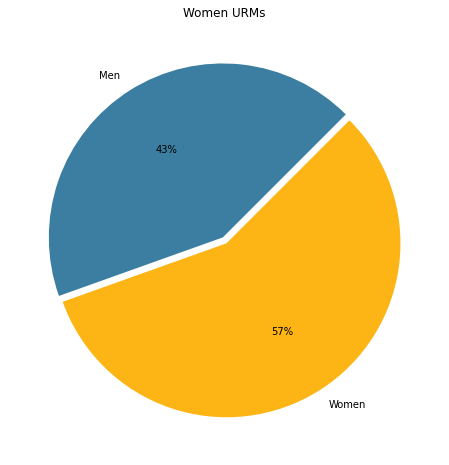

In [10]:
plt.figure(figsize = (10,8))
plt.pie(urms_women, labels=urms_women.index, colors=blue_gold, autopct="%.0f%%", explode=[0.02]*2, pctdistance=0.6, startangle=45)
plt.title("Women URMs")
#plt.xlabel("7 Declined to State Gender")

In [11]:
# do not run twice without resetting 'urms' variable
urms = urms.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
urms_ls = urms[urms['college'] == 'Clg of Letters & Science']

In [12]:
display(urms)
display(urms_ls)

,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


In [13]:
urms.groupby('college').count()['ppsk'].transpose()#.sort_values()

college
Clg of Chemistry                 56
Clg of Engineering              211
Clg of Environmental Design     109
Clg of Letters & Science       3005
Clg of Natural Resources        313
Haas School of Business         101
Name: ppsk, dtype: int64

Text(0.5, 0, 'Number of Students')

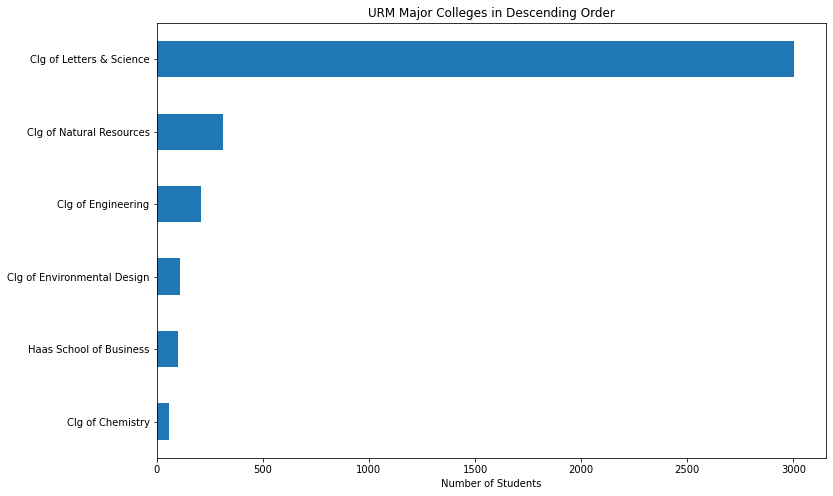

In [14]:
urms.groupby('college').count()['ppsk'].sort_values().plot(kind='barh', figsize=(12,8), title= "URM Major Colleges in Descending Order",xlabel="").set_xlabel("Number of Students")
# exactly same order for women

In [15]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


In [16]:
ethnicities = cleaned_jacobs.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk').drop_duplicates(subset='ppsk').rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
ethnicities

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male
2,895798,2015,Fall,N,N,Y,White/Other,Male
7,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female
8,856881,2015,Fall,N,Y,Y,International,Male
9,946962,2015,Fall,N,Y,Y,White/Other,Male
...,...,...,...,...,...,...,...,...
9018,2734942,2020,Fall,N,N,Y,White/Other,Female
9019,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female
9020,2738497,2020,Fall,N,Y,N,International,Male
9021,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male


In [17]:
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']

ppsk    554
Name: Underrepresented Minority, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'URMs at Jacobs')

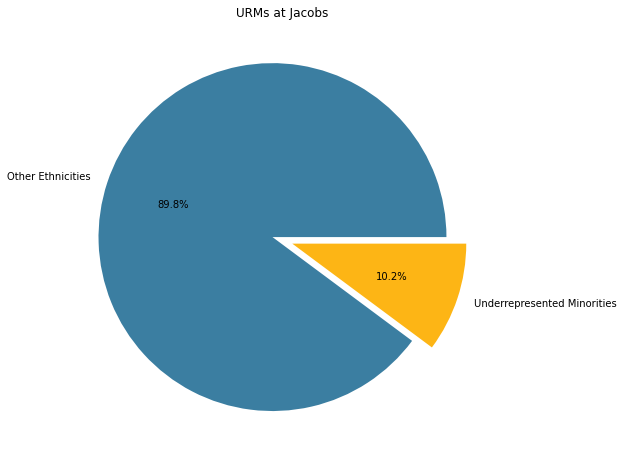

In [18]:
urms_jacobs = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[ethnicities.groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_jacobs, labels = urms_jacobs.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=blue_gold)
plt.title("URMs at Jacobs")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


Text(-0.17, 0.8, 'Berkeley')

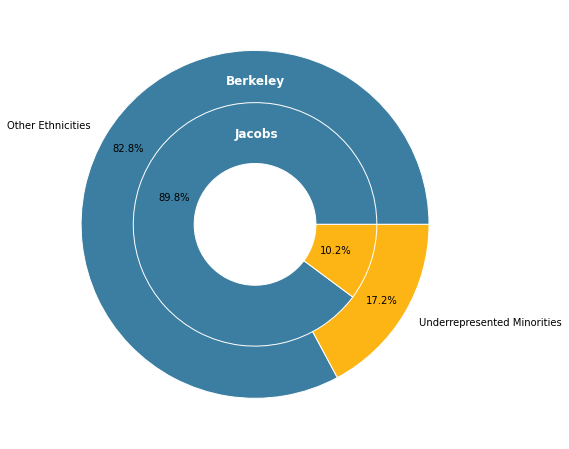

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12
        }
size = 0.3
ax.pie(urms_berk, radius=1, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), labels=urms_berk.index, autopct="%.1f%%", pctdistance=0.85)

ax.pie(urms_jacobs, radius=1-size, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), autopct="%.1f%%", pctdistance=0.7)
ax.text(-.12,.5,"Jacobs", fontdict=font)
ax.text(-.17,.8,"Berkeley", fontdict=font)

In [20]:
women_jacobs = ethnicities.groupby(['Ethnicity','Gender']).count()[['ppsk']].loc['Underrepresented Minority'].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']

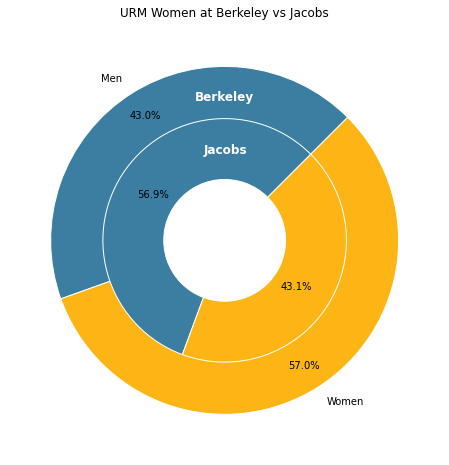

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12
        }
size = 0.3
ax.pie(urms_women, radius=1.0, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), labels=urms_women.index, autopct="%.1f%%", pctdistance=.85, startangle=45)

ax.pie(women_jacobs, radius=1-size, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), autopct="%.1f%%", pctdistance=0.7, startangle=45)
'''ax.text(.35,.2,"Jacobs", fontdict=font)
ax.text(.5,.5,"Berkeley", fontdict=font)'''
ax.text(-.12,.5,"Jacobs", fontdict=font)
ax.text(-.17,.8,"Berkeley", fontdict=font)
ax.set(aspect="equal", title='URM Women at Berkeley vs Jacobs')
plt.show()

In [22]:
incomes = cleaned_jacobs[cleaned_jacobs['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)
incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,income.student
0,781707,2015,Fall,N,N,Y,18000.0,0.0
2,895798,2015,Fall,N,N,Y,0.0,22000.0
7,857674,2015,Fall,N,N,Y,150000.0,0.0
8,856881,2015,Fall,N,Y,Y,180000.0,0.0
9,946962,2015,Fall,N,Y,Y,97436.0,0.0
...,...,...,...,...,...,...,...,...
7927,2734942,2020,Fall,N,N,Y,160000.0,0.0
7928,2736241,2020,Fall,N,Y,N,75000.0,0.0
7929,2738497,2020,Fall,N,Y,N,750000.0,0.0
7930,2743294,2020,Fall,N,Y,N,15000.0,0.0


In [25]:
ethnicities

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male
2,895798,2015,Fall,N,N,Y,White/Other,Male
7,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female
8,856881,2015,Fall,N,Y,Y,International,Male
9,946962,2015,Fall,N,Y,Y,White/Other,Male
...,...,...,...,...,...,...,...,...
9018,2734942,2020,Fall,N,N,Y,White/Other,Female
9019,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female
9020,2738497,2020,Fall,N,Y,N,International,Male
9021,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male


## Variable 'ethnicities' created by merging cleaned Jacobs data with gender and ethnicity from 'stem_paths'

Text(0.5, 0, 'Number of Students')

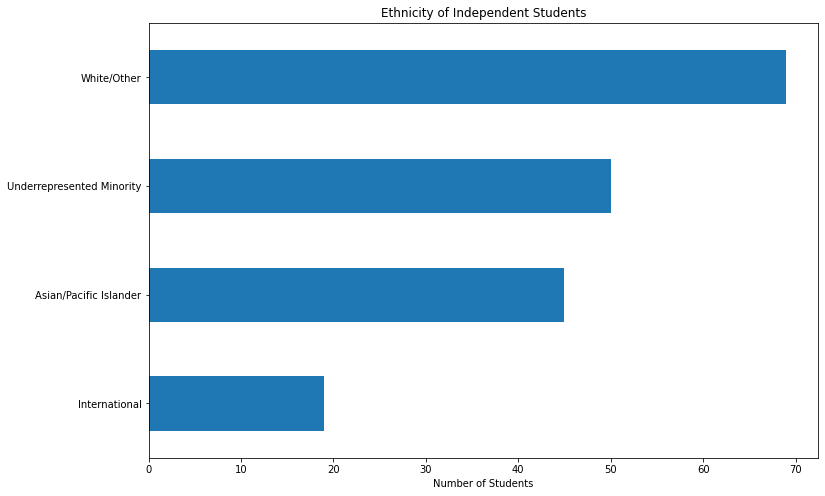

In [35]:
incomes = ethnicities[ethnicities['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)#.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
incomes[incomes['income.student'] != 0].groupby('Ethnicity').count()['ppsk'].sort_values().plot(kind='barh', figsize=(12,8), xlabel="", title= "Ethnicity of Independent Students").set_xlabel("Number of Students")

In [24]:
incomes[incomes['Ethnicity'] == 'Underrepresented Minority'].groupby('income.student').count()

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent
income.student,,,,,,,,,
0.0,472,472,472,472,472,472,472,472,472
3000.0,1,1,1,1,1,1,1,1,1
3124.0,1,1,1,1,1,1,1,1,1
3247.0,1,1,1,1,1,1,1,1,1
4000.0,1,1,1,1,1,1,1,1,1
4783.0,1,1,1,1,1,1,1,1,1
4800.0,1,1,1,1,1,1,1,1,1
5000.0,2,2,2,2,2,2,2,2,2
5214.0,1,1,1,1,1,1,1,1,1
